# Import

In [1]:
#Importing
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path 
path = r'/Users/crystalosuna/Documents/05-2023 Instacart Basket Analysis'

In [3]:
#import merged dataset
df_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ready_merged.pkl'))

# Step 2

In [4]:
#Check data
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


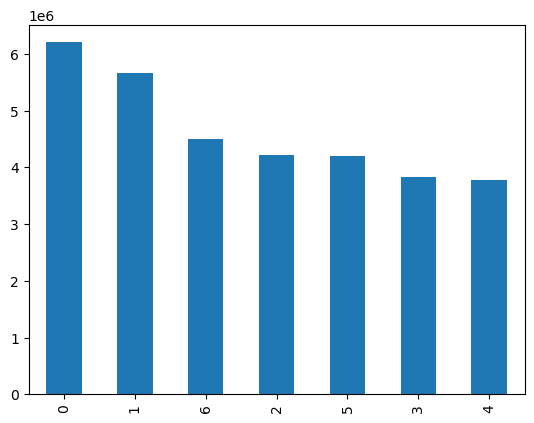

In [5]:
#Create a bar chart
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

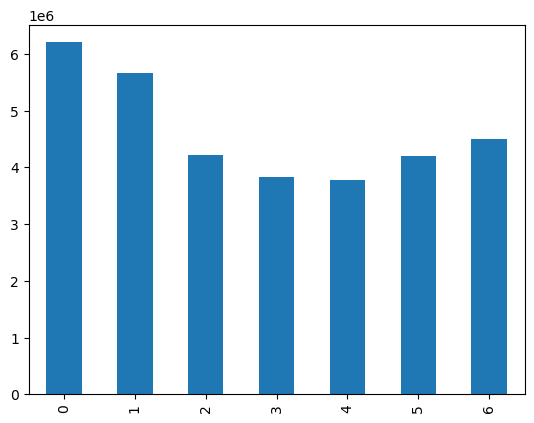

In [6]:
#Sort bar chart
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#Export bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders.png'))

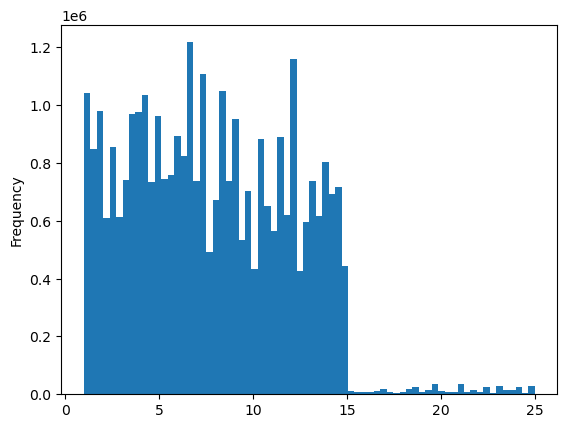

In [8]:
#Create a histogram
hist = df_combined['prices'].plot.hist(bins = 70)

In [9]:
#Export histogram chart as an image
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_combined.png'))

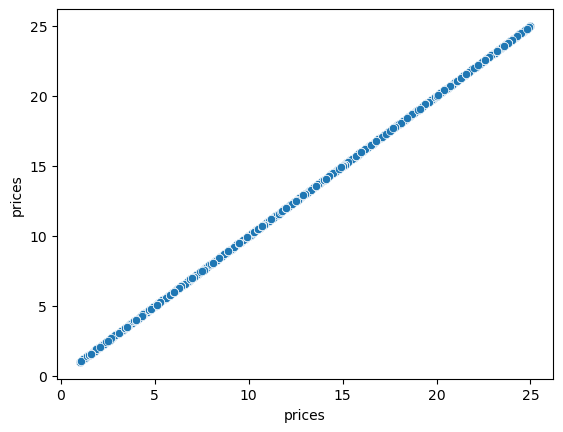

In [10]:
#Create a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [11]:
#Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

In [12]:
#Create a list holding true/false values to test the np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [15]:
#spliting datafram into two samples. Store 70% of sample in big and 30% in small
big = df_combined[dev]
small = df_combined[~dev]

In [17]:
#check length
len(df_combined)

32404859

In [18]:
#check for the number of samples 
len(big) + len(small)

32404859

In [19]:
#create new dataframe of prices and order_day_of_week columns from 'small'
df_small = small[['orders_day_of_week','prices']]

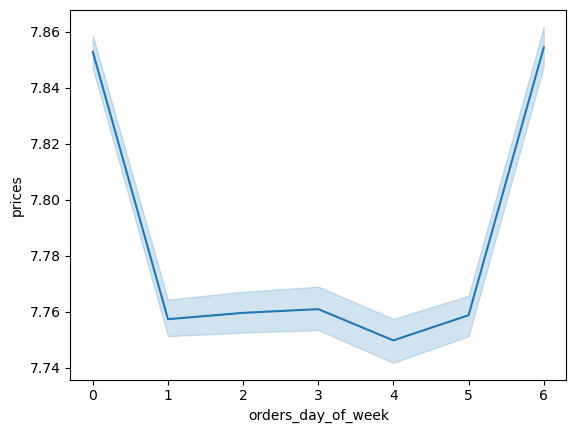

In [20]:
#Create lineplot
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [21]:
#Export the lineplot
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_combined.png' ))

# Step 3

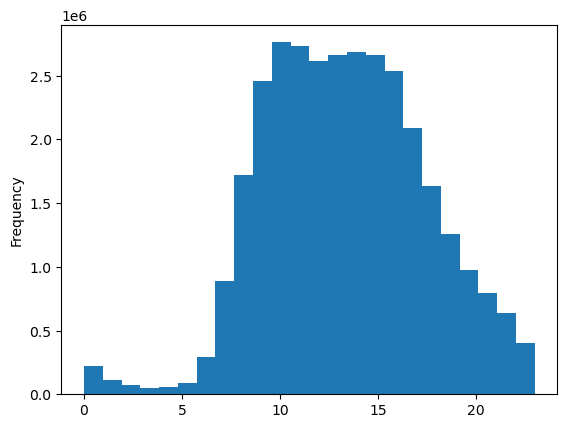

In [23]:
#Create a histogram for 'order_hour_of_day'
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

The frequency of the orders peaked between 10 and 15 which is between 10am to 3pm.

In [24]:
#Export histogram chart 
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour.png'))

# Step 4

In [25]:
df_combined['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

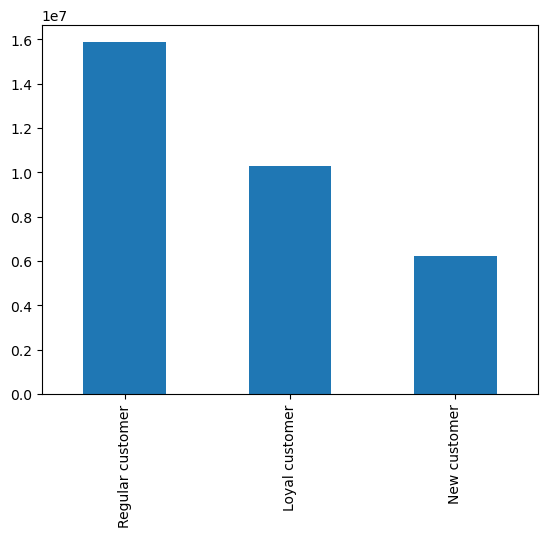

In [26]:
#Create bar chart for loyalty flag
loyalty_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [27]:
#Export bar chart
loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_loyalty_flag.png' ))

# Step 5

In [28]:
#Create small dataframe for the columns we need and using 'small'
df_small_2 = small[['prices', 'order_hour_of_day'] ]

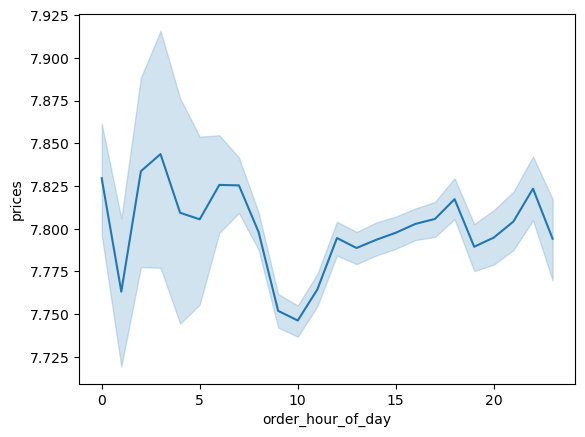

In [29]:
#Create lineplot
line_hour_prices = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

In [30]:
#Export lineplot
line_hour_prices.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_hour_prices.png' ))

# Step 6

In [31]:
#Create small dataframe for the age & number of dependents from 'small' to check connection
df_small_3 = small[['age', 'Number_of_Dependants']]

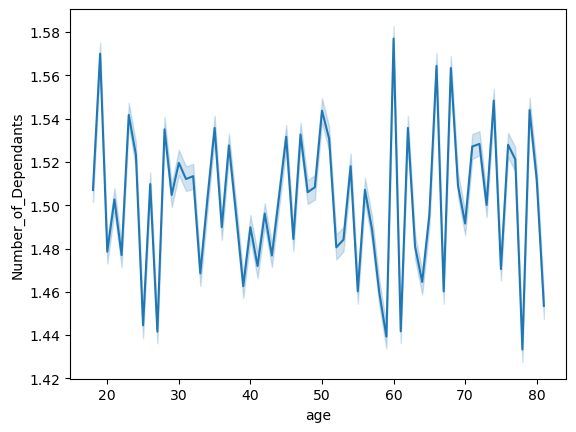

In [32]:
#Create lineplot 
line_age_depeendants = sns.lineplot (data = df_small_3, x = 'age', y = 'Number_of_Dependants')

The line plot doesn't show a clear realtionship between age and number of dependents.

In [34]:
#Export lineplot
line_age_depeendants.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'line_age_dependants.png'))

# Step 7

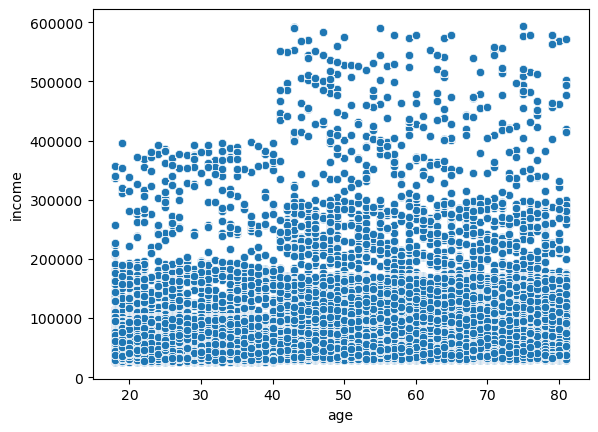

In [35]:
#Create a scatter plot for age and income
scatterplot_income = sns.scatterplot(data = df_combined, x= 'age', y = 'income')

The scatterplot shows that people ages 20 to 40 make less than 400,000 while ages 40 or older make up to 600,000 having more spending power. But in general most people make 200,000 or less.

In [37]:
#Export scatterplot
scatterplot_income.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'scatterplot_income.png'))